In [ ]:
### Classifying Exoplanets
#### By: Alexandria Ransom
###### Objective: Building a simple classification machine learning to predict whether an observation is an exoplanet or not. This will later turn into a button that can predict these exoplanets
###### Data Background: THis data is from Caltech 2018 NASA Kepler Mission... This shows data of star light curves. From these light curves, we can classify an exoplanet or other astronomical phenomena


In [ ]:
# Import Modules and Libraries

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from imblearn.over_sampling import RandomOverSampler  # for oversampling
#from imblearn.under_sampling import RandomUnderSampler         # for undersampling

#from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('exoplanets_2018.csv')

In [ ]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
# 1.)  Doing Mini EDA To get a better understanding of our target column

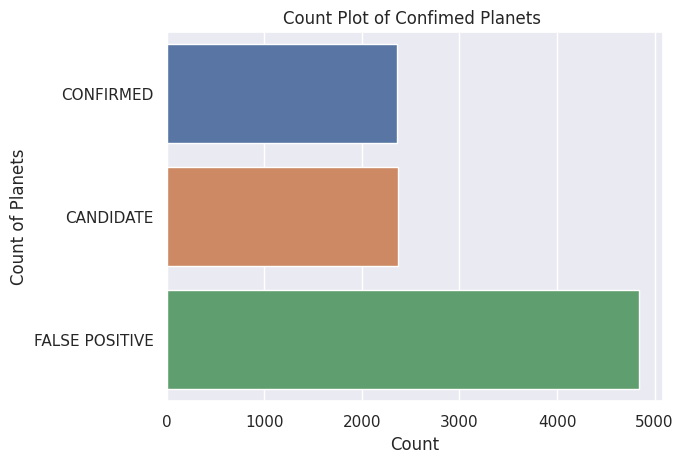

In [ ]:
sns.set(style="darkgrid")
sns.set()
sns.countplot(data=df,y='koi_disposition')
plt.title("Count Plot of Confimed Planets ")
plt.xlabel("Count")
plt.ylabel("Count of Planets")
plt.show()

In [ ]:
df.shape

(9564, 49)

In [ ]:
#49 features
#9564 records
print(df['koi_disposition'].unique())
print(df['koi_pdisposition'].unique())

['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']
['CANDIDATE' 'FALSE POSITIVE']


In [ ]:
# Select the features (X) and the target variables (y)
X =df.drop(['koi_disposition'], axis=1)
y = df[['koi_disposition']]

In [ ]:
ros = RandomOverSampler(random_state = 0)
X_res, y_res = ros.fit_resample(X,y)
print(sorted(Counter(y_res).items()), y_res.shape)

[('koi_disposition', 1)] (14520, 1)


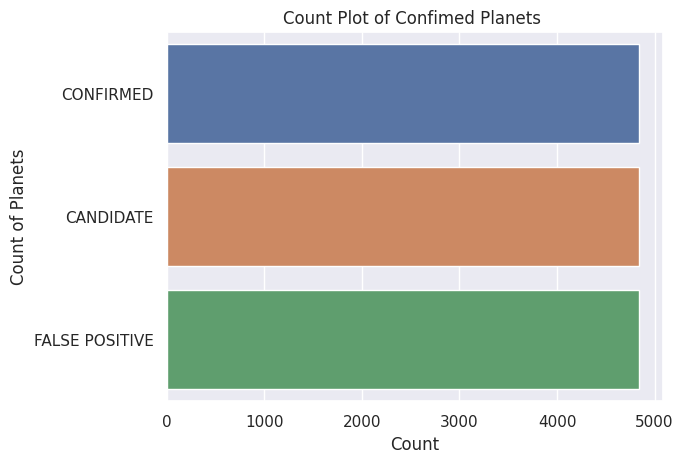

In [ ]:
sns.set(style="darkgrid")
sns.countplot(data=y_res,y='koi_disposition')
plt.title("Count Plot of Confimed Planets ")
plt.xlabel("Count")
plt.ylabel("Count of Planets")
plt.show()

In [ ]:
# 2.) Splitting the Dat Into a Training and Testing Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, shuffle = True, random_state = 222, stratify =y_res['koi_disposition'])

In [ ]:
X_train.shape

(11616, 48)

In [ ]:
X_test.shape

(2904, 48)

In [ ]:
# 3.) Do pre-processing like one-hot encoding, fixing missing values, removing columns, wrangling

In [ ]:
X_train

,kepid,kepoi_name,kepler_name,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7565,9851123,K06074.01,NaN,FALSE POSITIVE,0.000,0,1,1,1,8.480305,...,-164.0,4.573,0.038,-0.142,0.812,0.188,-0.075,298.79437,46.680771,15.736
12343,4139816,K00812.03,Kepler-235 e,CANDIDATE,1.000,0,0,0,0,46.184204,...,-86.0,4.754,0.042,-0.031,0.493,0.033,-0.040,286.07913,39.278320,15.954
7634,4663658,K03187.01,NaN,FALSE POSITIVE,0.000,1,0,0,0,0.705891,...,-464.0,4.077,0.242,-0.198,2.449,0.838,-0.838,294.20782,39.789291,11.321
12297,7604328,K02458.01,Kepler-1245 b,CANDIDATE,0.998,0,0,0,0,4.354074,...,-162.0,4.421,0.149,-0.198,0.909,0.213,-0.142,290.74432,43.260780,15.404
11312,11519187,K04625.01,NaN,CANDIDATE,0.493,0,0,0,0,2.440839,...,-170.0,4.623,0.032,-0.054,0.698,0.074,-0.056,297.05902,49.478500,15.877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,6116172,K06142.01,NaN,CANDIDATE,NaN,0,0,0,0,69.646793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.48145,41.499420,13.735
10274,10972902,K04692.02,NaN,CANDIDATE,0.675,0,0,0,0,7.672084,...,-179.0,4.570,0.035,-0.196,0.807,0.222,-0.059,290.44476,48.462891,14.766
3694,4946584,K04088.01,NaN,FALSE POSITIVE,0.000,1,0,1,0,0.907944,...,-213.0,4.354,0.084,-0.210,1.166,0.378,-0.162,297.36047,40.056141,13.819
203,7270230,K00876.01,NaN,FALSE POSITIVE,0.000,0,1,0,0,6.998100,...,-152.0,4.566,0.038,-0.152,0.829,0.181,-0.065,287.88412,42.832439,15.877


In [ ]:
X_train.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,1.161600e+04,9903.000000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000,11181.000000,11181.000000,11616.000000,...,11139.000000,11257.000000,11167.000000,11167.000000,11257.000000,11167.000000,11167.000000,11616.000000,11616.000000,11615.000000
mean,7.783283e+06,0.630665,0.185950,0.152893,0.131629,0.079373,72.997809,0.001926,-0.001926,166.062496,...,-154.259987,4.331377,0.113445,-0.138373,1.593999,0.323775,-0.339120,291.871495,43.935440,14.289971
std,2.642327e+06,0.455528,6.107646,0.359899,0.338101,0.270332,1212.172157,0.007291,0.007291,65.600181,...,66.030388,0.397795,0.122721,0.084735,5.766886,0.811979,1.959081,4.767563,3.602778,1.335757
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1519.000000,0.114000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,7.391000
25%,5.709081e+06,0.000000,0.000000,0.000000,0.000000,0.000000,3.701221,0.000009,-0.000313,133.171212,...,-192.000000,4.243000,0.042000,-0.195000,0.827000,0.118000,-0.220000,288.412852,40.949020,13.497000
50%,8.025657e+06,0.970000,0.000000,0.000000,0.000000,0.000000,11.346858,0.000050,-0.000050,138.409600,...,-152.000000,4.440000,0.068000,-0.120000,0.999000,0.232000,-0.107000,292.126665,43.853260,14.542000
75%,9.904666e+06,1.000000,0.000000,0.000000,0.000000,0.000000,42.575538,0.000313,-0.000009,171.092308,...,-103.000000,4.542000,0.139000,-0.084000,1.297000,0.345000,-0.067000,295.624690,46.784300,15.311000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [ ]:
#removing kepid
X_train = X_train[['kepoi_name', 'kepler_name', 'koi_pdisposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']]

In [ ]:
X_train.head()

,kepoi_name,kepler_name,koi_pdisposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7565,K06074.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,1,8.480305,...,-164.0,4.573,0.038,-0.142,0.812,0.188,-0.075,298.79437,46.680771,15.736
12343,K00812.03,Kepler-235 e,CANDIDATE,CANDIDATE,1.000,0,0,0,0,46.184204,...,-86.0,4.754,0.042,-0.031,0.493,0.033,-0.040,286.07913,39.278320,15.954
7634,K03187.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,0,0.705891,...,-464.0,4.077,0.242,-0.198,2.449,0.838,-0.838,294.20782,39.789291,11.321
12297,K02458.01,Kepler-1245 b,CANDIDATE,CANDIDATE,0.998,0,0,0,0,4.354074,...,-162.0,4.421,0.149,-0.198,0.909,0.213,-0.142,290.74432,43.260780,15.404
11312,K04625.01,NaN,CANDIDATE,CANDIDATE,0.493,0,0,0,0,2.440839,...,-170.0,4.623,0.032,-0.054,0.698,0.074,-0.056,297.05902,49.478500,15.877


In [ ]:
# Removing inf values
has_inf = X_train.isin([float('inf'), float('-inf')]).any().any()

if has_inf:
   print("DataFrame contains infinite values.")
else:
    print("DataFrame does not contain infinite values.")

DataFrame does not contain infinite values.


In [ ]:
X_train


,kepoi_name,kepler_name,koi_pdisposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7565,K06074.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,1,8.480305,...,-164.0,4.573,0.038,-0.142,0.812,0.188,-0.075,298.79437,46.680771,15.736
12343,K00812.03,Kepler-235 e,CANDIDATE,CANDIDATE,1.000,0,0,0,0,46.184204,...,-86.0,4.754,0.042,-0.031,0.493,0.033,-0.040,286.07913,39.278320,15.954
7634,K03187.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,0,0.705891,...,-464.0,4.077,0.242,-0.198,2.449,0.838,-0.838,294.20782,39.789291,11.321
12297,K02458.01,Kepler-1245 b,CANDIDATE,CANDIDATE,0.998,0,0,0,0,4.354074,...,-162.0,4.421,0.149,-0.198,0.909,0.213,-0.142,290.74432,43.260780,15.404
11312,K04625.01,NaN,CANDIDATE,CANDIDATE,0.493,0,0,0,0,2.440839,...,-170.0,4.623,0.032,-0.054,0.698,0.074,-0.056,297.05902,49.478500,15.877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,K06142.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,69.646793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.48145,41.499420,13.735
10274,K04692.02,NaN,CANDIDATE,CANDIDATE,0.675,0,0,0,0,7.672084,...,-179.0,4.570,0.035,-0.196,0.807,0.222,-0.059,290.44476,48.462891,14.766
3694,K04088.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,1,0,0.907944,...,-213.0,4.354,0.084,-0.210,1.166,0.378,-0.162,297.36047,40.056141,13.819
203,K00876.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,6.998100,...,-152.0,4.566,0.038,-0.152,0.829,0.181,-0.065,287.88412,42.832439,15.877


In [ ]:
X_train.replace([np.inf,-np.inf], np.nan, inplace=True)

In [ ]:
X_train

,kepoi_name,kepler_name,koi_pdisposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7565,K06074.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,1,8.480305,...,-164.0,4.573,0.038,-0.142,0.812,0.188,-0.075,298.79437,46.680771,15.736
12343,K00812.03,Kepler-235 e,CANDIDATE,CANDIDATE,1.000,0,0,0,0,46.184204,...,-86.0,4.754,0.042,-0.031,0.493,0.033,-0.040,286.07913,39.278320,15.954
7634,K03187.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,0,0.705891,...,-464.0,4.077,0.242,-0.198,2.449,0.838,-0.838,294.20782,39.789291,11.321
12297,K02458.01,Kepler-1245 b,CANDIDATE,CANDIDATE,0.998,0,0,0,0,4.354074,...,-162.0,4.421,0.149,-0.198,0.909,0.213,-0.142,290.74432,43.260780,15.404
11312,K04625.01,NaN,CANDIDATE,CANDIDATE,0.493,0,0,0,0,2.440839,...,-170.0,4.623,0.032,-0.054,0.698,0.074,-0.056,297.05902,49.478500,15.877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,K06142.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,69.646793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.48145,41.499420,13.735
10274,K04692.02,NaN,CANDIDATE,CANDIDATE,0.675,0,0,0,0,7.672084,...,-179.0,4.570,0.035,-0.196,0.807,0.222,-0.059,290.44476,48.462891,14.766
3694,K04088.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,1,0,0.907944,...,-213.0,4.354,0.084,-0.210,1.166,0.378,-0.162,297.36047,40.056141,13.819
203,K00876.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,6.998100,...,-152.0,4.566,0.038,-0.152,0.829,0.181,-0.065,287.88412,42.832439,15.877


In [ ]:
X_train.isnull().sum()

kepoi_name               0
kepler_name           7742
koi_pdisposition         0
koi_pdisposition         0
koi_score             1713
koi_fpflag_nt            0
koi_fpflag_ss            0
koi_fpflag_co            0
koi_fpflag_ec            0
koi_period               0
koi_period_err1        435
koi_period_err2        435
koi_time0bk              0
koi_time0bk_err1       435
koi_time0bk_err2       435
koi_impact             359
koi_impact_err1        435
koi_impact_err2        435
koi_duration             0
koi_duration_err1      435
koi_duration_err2      435
koi_depth              359
koi_depth_err1         435
koi_depth_err2         435
koi_prad               359
koi_prad_err1          359
koi_prad_err2          359
koi_teq                359
koi_teq_err1         11616
koi_teq_err2         11616
koi_insol              324
koi_insol_err1         324
koi_insol_err2         324
koi_model_snr          359
koi_tce_plnt_num       340
koi_tce_delivname      340
koi_steff              359
k

In [ ]:
#because koi_teq_err1 9564, koi_teq_err1 9564 are completely missing, I will drop these
X_train.info()
X_train=X_train.drop(columns=['koi_teq_err1','koi_teq_err2']) # make sure to drop missing columns befor seperating to numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11616 entries, 7565 to 11590
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepoi_name         11616 non-null  object 
 1   kepler_name        3874 non-null   object 
 2   koi_pdisposition   11616 non-null  object 
 3   koi_pdisposition   11616 non-null  object 
 4   koi_score          9903 non-null   float64
 5   koi_fpflag_nt      11616 non-null  int64  
 6   koi_fpflag_ss      11616 non-null  int64  
 7   koi_fpflag_co      11616 non-null  int64  
 8   koi_fpflag_ec      11616 non-null  int64  
 9   koi_period         11616 non-null  float64
 10  koi_period_err1    11181 non-null  float64
 11  koi_period_err2    11181 non-null  float64
 12  koi_time0bk        11616 non-null  float64
 13  koi_time0bk_err1   11181 non-null  float64
 14  koi_time0bk_err2   11181 non-null  float64
 15  koi_impact         11257 non-null  float64
 16  koi_impact_err1    

In [ ]:
numerical_columns = X_train.select_dtypes(include=['number']).columns
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].median())

In [ ]:
X_train.isnull().sum()

kepoi_name              0
kepler_name          7742
koi_pdisposition        0
koi_pdisposition        0
koi_score               0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1         0
koi_period_err2         0
koi_time0bk             0
koi_time0bk_err1        0
koi_time0bk_err2        0
koi_impact              0
koi_impact_err1         0
koi_impact_err2         0
koi_duration            0
koi_duration_err1       0
koi_duration_err2       0
koi_depth               0
koi_depth_err1          0
koi_depth_err2          0
koi_prad                0
koi_prad_err1           0
koi_prad_err2           0
koi_teq                 0
koi_insol               0
koi_insol_err1          0
koi_insol_err2          0
koi_model_snr           0
koi_tce_plnt_num        0
koi_tce_delivname     340
koi_steff               0
koi_steff_err1          0
koi_steff_err2          0
koi_slogg               0
koi_slogg_er

In [ ]:
# Assuming 'df' is your DataFrame
#categorical_columns=X_train.select_dtypes(include=['object']).columns
#print(X_train.shape)
#print(X_train[categorical_columns].fillna('unknown').shape)


In [ ]:
X_train

,kepoi_name,kepler_name,koi_pdisposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7565,K06074.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,1,8.480305,...,-164.0,4.573,0.038,-0.142,0.812,0.188,-0.075,298.79437,46.680771,15.736
12343,K00812.03,Kepler-235 e,CANDIDATE,CANDIDATE,1.000,0,0,0,0,46.184204,...,-86.0,4.754,0.042,-0.031,0.493,0.033,-0.040,286.07913,39.278320,15.954
7634,K03187.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,0,0.705891,...,-464.0,4.077,0.242,-0.198,2.449,0.838,-0.838,294.20782,39.789291,11.321
12297,K02458.01,Kepler-1245 b,CANDIDATE,CANDIDATE,0.998,0,0,0,0,4.354074,...,-162.0,4.421,0.149,-0.198,0.909,0.213,-0.142,290.74432,43.260780,15.404
11312,K04625.01,NaN,CANDIDATE,CANDIDATE,0.493,0,0,0,0,2.440839,...,-170.0,4.623,0.032,-0.054,0.698,0.074,-0.056,297.05902,49.478500,15.877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,K06142.01,NaN,CANDIDATE,CANDIDATE,0.970,0,0,0,0,69.646793,...,-152.0,4.440,0.068,-0.120,0.999,0.232,-0.107,289.48145,41.499420,13.735
10274,K04692.02,NaN,CANDIDATE,CANDIDATE,0.675,0,0,0,0,7.672084,...,-179.0,4.570,0.035,-0.196,0.807,0.222,-0.059,290.44476,48.462891,14.766
3694,K04088.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,1,0,0.907944,...,-213.0,4.354,0.084,-0.210,1.166,0.378,-0.162,297.36047,40.056141,13.819
203,K00876.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,6.998100,...,-152.0,4.566,0.038,-0.152,0.829,0.181,-0.065,287.88412,42.832439,15.877


In [ ]:
#categorical_columns = X_train.select_dtypes(include=['object']).columns
#print("Categorical columns:", categorical_columns)


In [ ]:
#X_train[categorical_columns]

In [ ]:
# Identify unique categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns.unique()


In [ ]:
categorical_columns

Index(['kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_tce_delivname'], dtype='object')

In [ ]:
# Reset the index of X_train
X_train.reset_index(drop=True, inplace=True)

In [ ]:
# Fill missing values in unique categorical columns
X_train[categorical_columns] = X_train[categorical_columns].fillna('unknown') # retrying

ValueError: ignored

In [ ]:
X_train[categorical_columns] # keeps printing koi_pdisposition twice

,kepoi_name,kepler_name,koi_pdisposition,koi_pdisposition,koi_tce_delivname
0,K06074.01,unknown,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
1,K00812.03,Kepler-235 e,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
2,K03187.01,unknown,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
3,K02458.01,Kepler-1245 b,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
4,K04625.01,unknown,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
...,...,...,...,...,...
11611,K06142.01,unknown,CANDIDATE,CANDIDATE,q1_q16_tce
11612,K04692.02,unknown,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
11613,K04088.01,unknown,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
11614,K00876.01,unknown,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce


In [ ]:
# Assuming 'df' is your DataFrame
categorical_columns = X_train.select_dtypes(include=['object']).columns.unique()

In [ ]:
categorical_columns

Index(['kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_tce_delivname'], dtype='object')

In [ ]:
X_train[categorical_columns]

,kepoi_name,kepler_name,koi_pdisposition,koi_pdisposition,koi_tce_delivname
0,K06074.01,unknown,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
1,K00812.03,Kepler-235 e,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
2,K03187.01,unknown,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
3,K02458.01,Kepler-1245 b,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
4,K04625.01,unknown,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
...,...,...,...,...,...
11611,K06142.01,unknown,CANDIDATE,CANDIDATE,q1_q16_tce
11612,K04692.02,unknown,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
11613,K04088.01,unknown,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
11614,K00876.01,unknown,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce


In [ ]:
# tehres an error here it shows up twice

In [ ]:
categorical_columns=X_train.select_dtypes(include=['object']).columns

In [ ]:
X_train[categorical_columns]

,kepoi_name,kepler_name,koi_pdisposition,koi_pdisposition,koi_pdisposition,koi_pdisposition,koi_tce_delivname
0,K06074.01,unknown,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
1,K00812.03,Kepler-235 e,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
2,K03187.01,unknown,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
3,K02458.01,Kepler-1245 b,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
4,K04625.01,unknown,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
...,...,...,...,...,...,...,...
11611,K06142.01,unknown,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE,q1_q16_tce
11612,K04692.02,unknown,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE,q1_q17_dr25_tce
11613,K04088.01,unknown,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
11614,K00876.01,unknown,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce


In [ ]:
# this is showing up multiple times 	koi_pdisposition

In [ ]:
# Fill missing values in selected categorical columns
X_train[categorical_columns] = X_train[categorical_columns].applymap(lambda x: 'unknown' if pd.isnull(x) else x)

ValueError: ignored

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Reset the index of X_train
X_train.reset_index(drop=True, inplace=True)

# Loop through each categorical column and fill missing values
for col in categorical_columns:
    X_train[col] = X_train[col].fillna('unknown')


In [ ]:
X_train.isnull().sum()

kepoi_name           0
kepler_name          0
koi_pdisposition     0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra         

In [ ]:
print(X_train[categorical_columns].shape)

(11616, 7)


In [ ]:
# should be four only not 7

In [ ]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
# Count the occurrences of each column name
column_counts = Counter(categorical_columns)
print(column_counts)

Counter({'koi_pdisposition': 2, 'kepoi_name': 1, 'kepler_name': 1, 'koi_tce_delivname': 1})


In [ ]:
# Drop 'koi_pdisposition' twice  or once
categorical_columns = [col for col in categorical_columns if column_counts[col] != 1]

In [ ]:
# Loop through each categorical column and fill missing values
for col in categorical_columns:
    X_train[col] = X_train[col].fillna('unknown')

In [ ]:
X_train.isnull().sum()

kepoi_name           0
kepler_name          0
koi_pdisposition     0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra         

In [ ]:
X_train[categorical_columns]

,koi_pdisposition,koi_pdisposition,koi_pdisposition,koi_pdisposition
0,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
3,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE
4,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE
...,...,...,...,...
11611,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE
11612,CANDIDATE,CANDIDATE,CANDIDATE,CANDIDATE
11613,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
11614,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE


In [ ]:
X_train.corr()

In [ ]:
corrmat=X_train.corr() #pearson corrleation
top_corr_features=corrmat.index
plt.figure(figsize=(40,40))
#plot heatmap
sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap='RdYlGn')
#how to interperet graph green highly correlated, red negatively correlated

In [ ]:
X_train[categorical_columns]

In [ ]:
# Drop 'koi_pdisposition' twice
#categorical_columns = categorical_columns.drop(['koi_pdisposition', 'koi_pdisposition'])

In [ ]:
X_train[categorical_columns]